In [143]:
import numpy as np
import pandas as pd

In [144]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3757,ham,Lol no ouch but wish i'd stayed out a bit longer,NaN,NaN,NaN
1116,ham,Hey... What time is your driving on fri? We go...,NaN,NaN,NaN
901,ham,How is it possible to teach you. And where.,NaN,NaN,NaN
3892,ham,Have you heard from this week?,NaN,NaN,NaN
2507,ham,Yup...,NaN,NaN,NaN


In [145]:
df.shape

(5572, 5)

In [146]:
#1. Data cleaning
#2. EDA
#3. Text Preprossing
#4. MOdel Building
#5. Model Evaluation

<h1>1. Data Cleaning </h1>

In [147]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [148]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [149]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [150]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4892,ham,Send me the new number
2328,ham,That day you asked about anand number. Why:-)
3719,ham,"Yeah why not, is the gang all ready"
3932,ham,"Playin space poker, u?"
2279,ham,"Sorry, I'll call later in meeting"


In [151]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [152]:
df['target'] = le.fit_transform(df['target'])

In [153]:
df.sample(5)

,target,text
3195,0,"I av a new number, . Wil u only use this one,ta."
4311,0,I keep ten rs in my shelf:) buy two egg.
141,0,"Sir, Waiting for your mail."
3041,0,Slaaaaave ! Where are you ? Must I summon you ...
3020,0,Am in film ill call you later.


In [154]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [155]:
df = df.drop_duplicates(keep='first')

In [156]:
df.duplicated().sum()

0

<h1>2. EDA</h1>

In [157]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

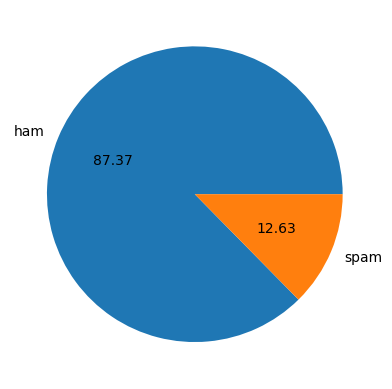

In [158]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [159]:
import nltk

In [160]:
!pip install nltk


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [161]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [162]:
df['num_characters'] = df['text'].apply(len)

In [163]:
df['num_words'] = df['text'].apply(lambda x: len (nltk.word_tokenize(x)))

In [164]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [165]:
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [166]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [167]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [168]:
df[df['target'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [169]:
df[df['target'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

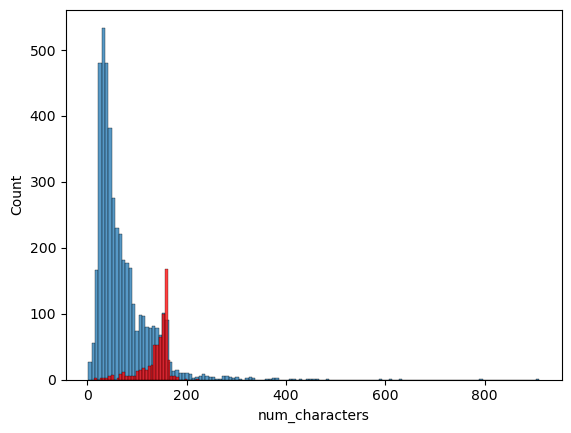

In [170]:
import seaborn as sns
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

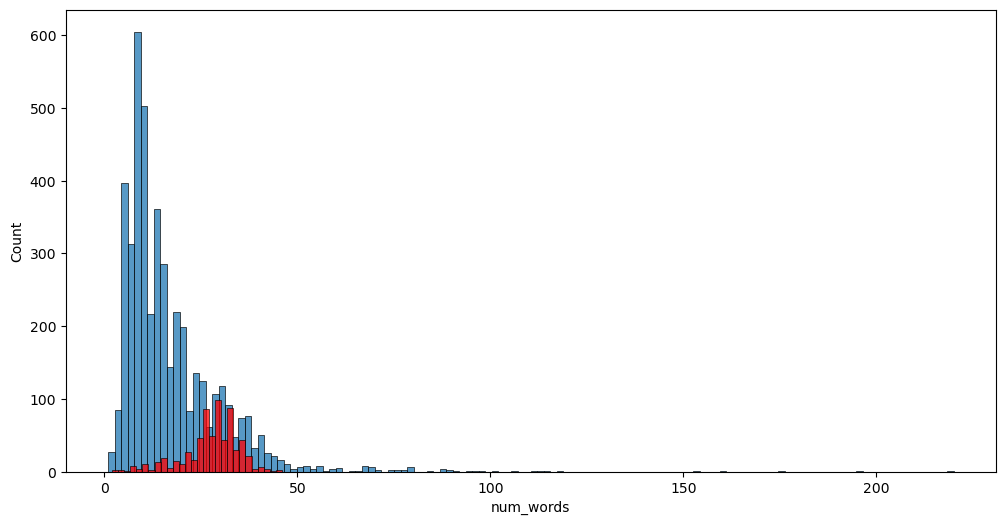

In [171]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

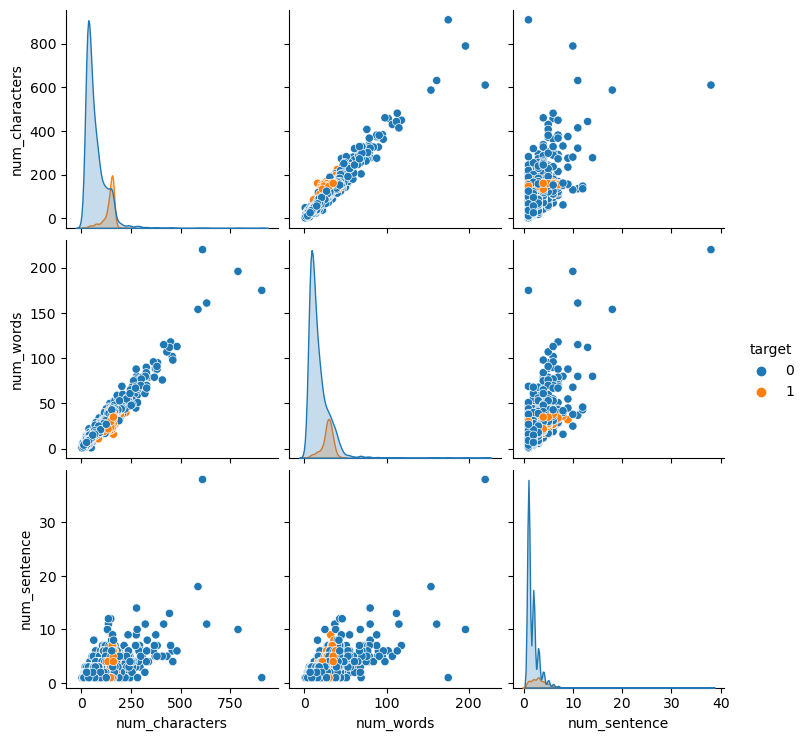

In [172]:
sns.pairplot(df, hue='target')

<h1> Data Preprocessing</h1>

In [173]:
# def transform_text(text):
#     text = text.lower()
#     text = nltk.word_tokenize(text)
    
#     y = []
#     for i in text:
#         if i.isalnum():
#             y.append(i)
    
#     text = y[:]
#     y.clear()
    
#     for i in text:
#         if i not in stopwords.words('english') and i not in string.punctuation:
#             y.append(i)
            
#     text = y[:]
#     y.clear()
    
#     for i in text:
#         y.append(ps.stem(i))
    
            
#     return " ".join(y)

In [174]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Load stopwords and stemmer once
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    
    cleaned = []
    for token in tokens:
        if token.isalnum() and token not in stop_words:
            stemmed = ps.stem(token)
            cleaned.append(stemmed)
    
    return " ".join(cleaned)


In [175]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [176]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [177]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [178]:
df['transformed_text'] = df['text'].apply(transform_text)

In [179]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [180]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=''))

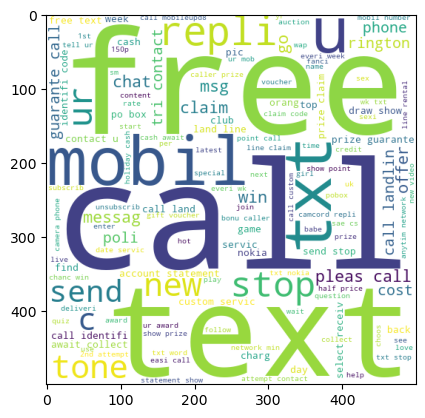

In [181]:
plt.imshow(spam_wc)

In [182]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=''))

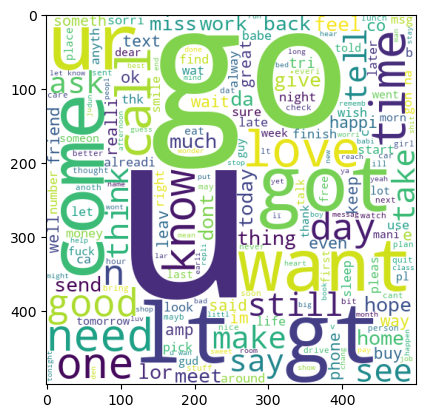

In [183]:
plt.imshow(spam_wc)

In [184]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [185]:

len(spam_corpus)

9939

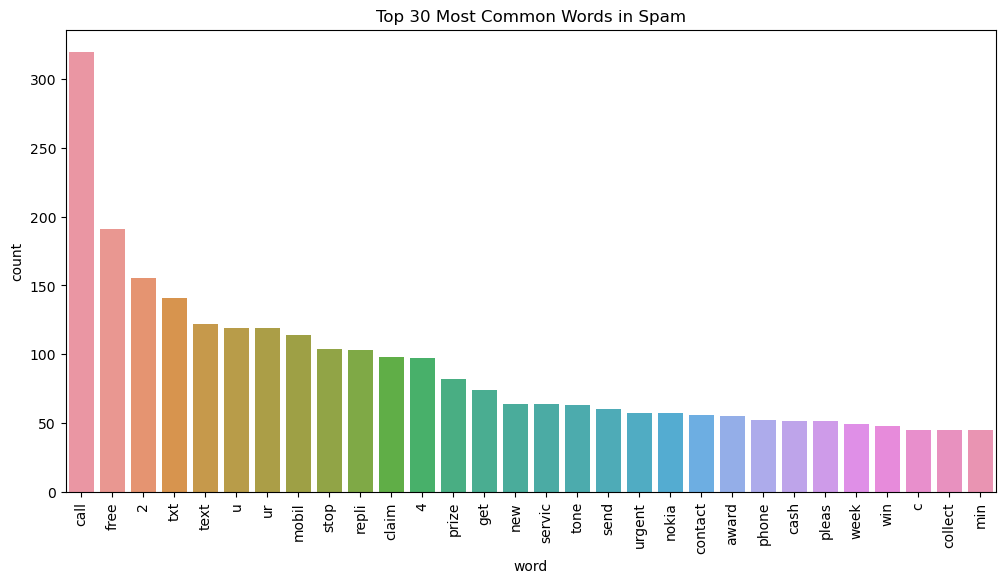

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Assuming spam_corpus is a list of words
top_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_top_words = pd.DataFrame(top_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_top_words)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam")
plt.show()


In [187]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [188]:
len(ham_corpus)

35404

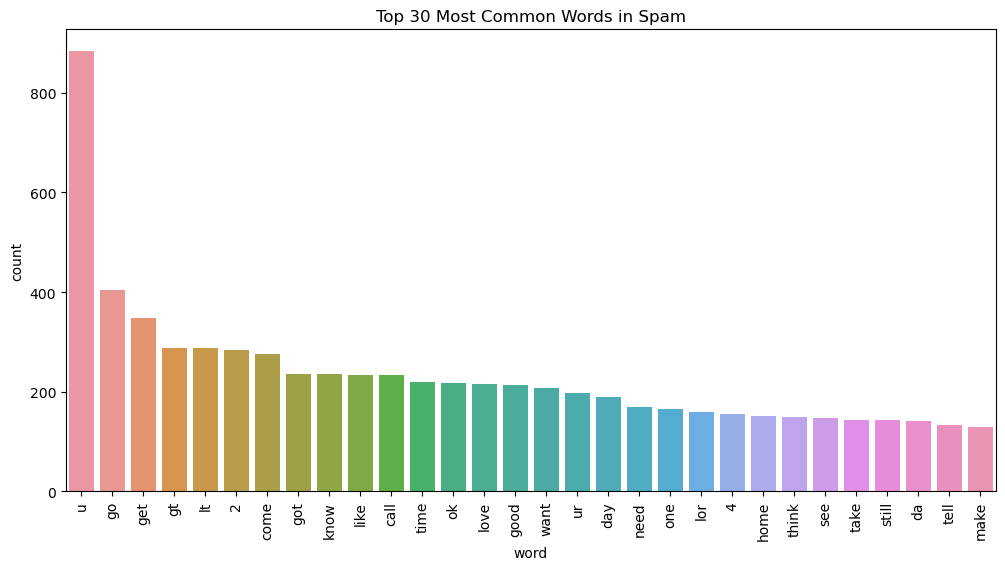

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Assuming spam_corpus is a list of words
top_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame
df_top_words = pd.DataFrame(top_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_top_words)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam")
plt.show()


<h1>4. Model Building</h1>

accuracy score of DecisionTreeClassifier:  0.9516441005802708
confusion matrix of DecisionTreeClassifier: 
 [[866  23]
 [ 27 118]]
precision score of DecisionTreeClassifier:  0.8368794326241135


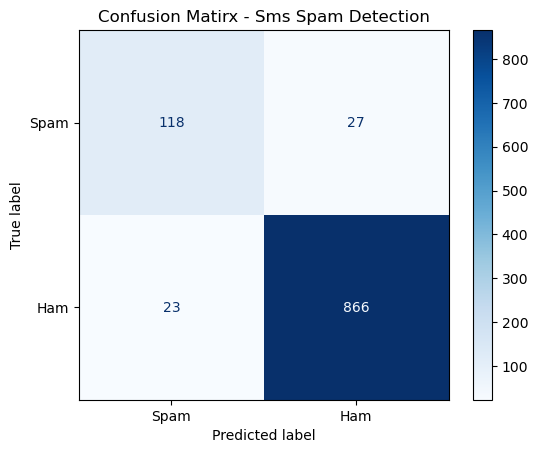

In [210]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier 

X = df['transformed_text']
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

vectorizer = TfidfVectorizer(max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

modal = DecisionTreeClassifier(random_state=42)
modal.fit(X_train_tfidf, y_train)

y_pred = modal.predict(X_test_tfidf)
print("accuracy score of DecisionTreeClassifier: ", accuracy_score(y_test, y_pred))
print("confusion matrix of DecisionTreeClassifier: \n", confusion_matrix(y_test, y_pred))
print("precision score of DecisionTreeClassifier: ", precision_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Spam', 'Ham'])
disp.plot(cmap='Blues')
plt.title("Confusion Matirx - Sms Spam Detection")
plt.show()



accuracy score of GaussianNB:  0.8684719535783365
confusion matrix of GaussianNB: 
 [[772 117]
 [ 19 126]]
precision score of GaussianNB:  0.5185185185185185


accuracy score of GaussianNB:  0.9738878143133463
confusion matrix of GaussianNB: 
 [[872  17]
 [ 10 135]]
precision score of GaussianNB:  0.8881578947368421


accuracy score of GaussianNB:  0.9661508704061895
confusion matrix of GaussianNB: 
 [[885   4]
 [ 31 114]]
precision score of GaussianNB:  0.9661016949152542


In [200]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
